In [1]:
import spatialdata

/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/.pixi/envs/default/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [28]:
sdata = spatialdata.read_zarr("../data/sdata/P26E20_spatialdata/20250225_sdata.zarr")

In [29]:
sdata

SpatialData object, with associated Zarr store: /Users/jnimoca/Jose_BI/1_Pipelines/openDVP/data/sdata/P26E20_spatialdata/20250225_sdata.zarr
├── Images
│     └── 'image': DataTree[cyx] (15, 44470, 73167), (15, 14823, 24389), (15, 4941, 8129), (15, 1647, 2709)
├── Labels
│     └── 'mask': DataTree[yx] (44470, 73167), (14823, 24389), (4941, 8129), (1647, 2709)
├── Shapes
│     └── 'seg_polygons': GeoDataFrame shape: (685805, 2) (2D shapes)
└── Tables
      └── 'imaging': AnnData (685805, 75)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), mask (Labels), seg_polygons (Shapes)

In [7]:
bb_xmin = 30000
bb_ymin = 25000
bb_w = 2500
bb_h = 2500
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

cropped_sdata = sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="global",
    filter_table=True,
)

In [5]:
import napari_spatialdata

In [8]:
napari_spatialdata.Interactive(cropped_sdata).run()

In [9]:
import spatialdata_plot

In [10]:
cropped_sdata

SpatialData object
├── Images
│     └── 'mIF': DataTree[cyx] (15, 2500, 2500), (15, 833, 833), (15, 277, 278), (15, 92, 92)
├── Labels
│     └── 'mask': DataTree[yx] (2500, 2500), (833, 833), (277, 278), (92, 92)
├── Shapes
│     ├── 'mask_polygons': GeoDataFrame shape: (4907, 2) (2D shapes)
│     ├── 'primary_lmd_contours': GeoDataFrame shape: (8, 18) (2D shapes)
│     ├── 'relapse_lmd_contours': GeoDataFrame shape: (1, 18) (2D shapes)
│     ├── 'voronoi_RCN': GeoDataFrame shape: (52, 31) (2D shapes)
│     └── 'voronoi_cells': GeoDataFrame shape: (2981, 33) (2D shapes)
└── Tables
      ├── 'imaging': AnnData (4907, 75)
      └── 'proteins': AnnData (6, 4766)
with coordinate systems:
    ▸ 'global', with elements:
        mIF (Images), mask (Labels), mask_polygons (Shapes), primary_lmd_contours (Shapes), relapse_lmd_contours (Shapes), voronoi_RCN (Shapes), voronoi_cells (Shapes)

In [19]:
cropped_sdata['mIF'].scale0

DataTree('scale0', parent="None")
    Dimensions:  (c: 15, y: 2500, x: 2500)
    Coordinates:
      * c        (c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
      * y        (y) float64 0.5 1.5 2.5 3.5 ... 2.498e+03 2.498e+03 2.5e+03
      * x        (x) float64 0.5 1.5 2.5 3.5 ... 2.498e+03 2.498e+03 2.5e+03
    Data variables:
        image    (c, y, x) uint8 dask.array<chunksize=(15, 1112, 1232), meta=np.ndarray>

In [27]:
cropped_sdata['imaging'].obs.columns

Index(['CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'shapes'],
      dtype='object')

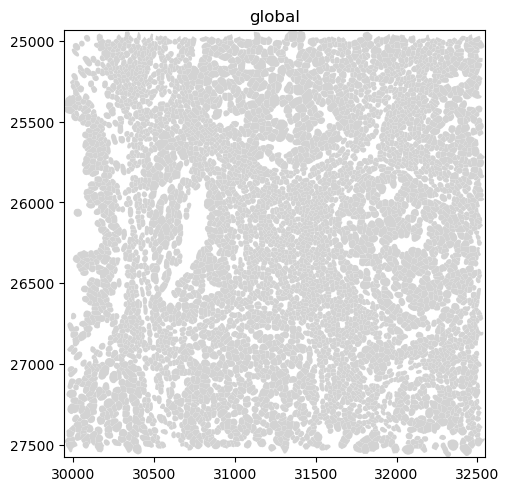

In [30]:
# plot phenotype points
cropped_sdata.pl.render_shapes(element="mask_polygons", color="phenotype",table_name="imaging").pl.show()

In [ ]:
# .pl.render_images(element="mIF", channel=7, cmap="Blues")